In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

import pickle

import matplotlib.style as style

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Palatino"
})

# use seaborn
# style.use('seaborn')

# style.use('tableau-colorblind10')

In [10]:
gbs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lengths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
subsets = ["NA", "noHydro", "candidate1", "candidate2", "candidate3", "candidate4", "candidate5", "candidate6", "candidate7", "candidate8", "candidate9", "candidate10", "candidate11", "candidate12", "candidate13", "candidate14"]
xis = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6]
energys = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
taus = [0, 0.1, 1, 5, 10, 15, 25, 50, 75, 100]
volatilities = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
random_subsets = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
marginals = [2,4,6,8]
results = {}
for gb in gbs:
    try:
        with open("gb/gb_results{}.pickle".format(int(gb)), "rb") as f:
            result = pickle.load(f)
            results[("GB", gb)] = result
    except:
        print("nothing here")
for length in lengths:
    try:
        with open("length/length_results{}.pickle".format(int(length)), "rb") as f:
            result = pickle.load(f)
            results[("length", length)] = result
    except:
        print("nothing here")
for subset in subsets:
    try:
        with open("subset/subset_{}.pickle".format(subset), "rb") as f:
            result = pickle.load(f)
            results[("subset", subset)] = result
    except:
        print("nothing here")
for xi in xis:
    try:
        with open("xi/xi_results{}.pickle".format(xi*100), "rb") as f:
            result = pickle.load(f)
            results[("xi", xi)] = result
    except:
        print("nothing here")
for energy in energys:
    try:
        with open("energy/energy_results{}.pickle".format(energy), "rb") as f:
            result = pickle.load(f)
            results[("energy", energy)] = result
    except:
        print("nothing here")
for tau in taus:
    try:
        with open("tau/tau_results{}.pickle".format(tau), "rb") as f:
            result = pickle.load(f)
            results[("tau", tau)] = result
    except:
        print("nothing here")
for volatility in volatilities:
    try:
        with open("volatility/volatility_results{}.pickle".format(volatility), "rb") as f:
            result = pickle.load(f)
            results[("volatility", volatility)] = result
    except:
        print("nothing here")
for random_subset in random_subsets:
    try:
        with open("random_subset/random_subset{}.pickle".format(random_subset), "rb") as f:
            result = pickle.load(f)
            results[("random_subset", random_subset)] = result
    except:
        print("nothing here")
for marginal in marginals:
    try:
        with open("marginal/marginal_results{}.pickle".format(marginal), "rb") as f:
            result = pickle.load(f)
            results[("marginal", marginal)] = result
    except:
        print("nothing here")
try:
    with open("google_length/google_length_results1.pickle", "rb") as f:
        result = pickle.load(f)
        results[("google_length", 1)] = result
except:
    print("nothing here")

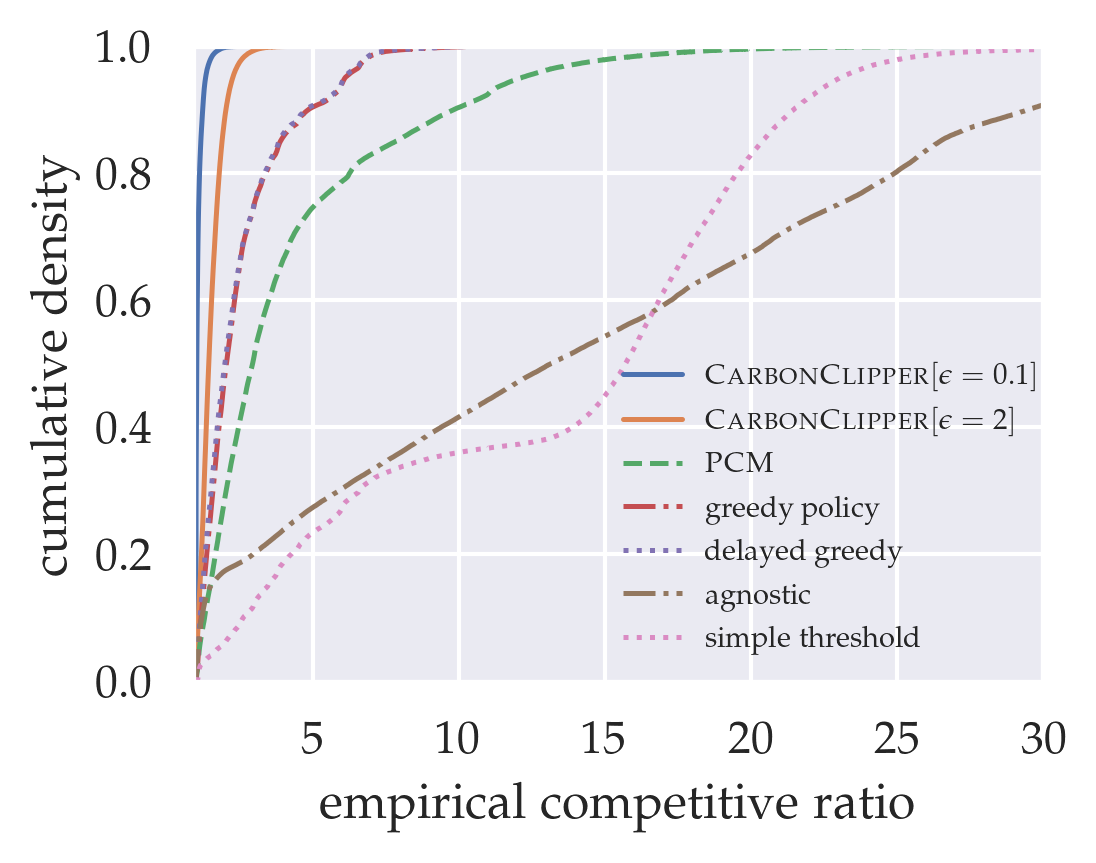

In [13]:
# style.use('seaborn-v0_8-paper')
######################### plotting CDF


# compute the competitive ratios for each setting of d and beta
pcms = np.array([])
greedys = np.array([])
delayGreedys = np.array([])
agnostics = np.array([])
constThresholds = np.array([])
clip0s = np.array([])
clip2s = np.array([])
for key in results.keys():
    if key[0] in ["xi", "marginal"]:
        continue
    cost_opts = results[key]["cost_opts"]
    cost_pcms = results[key]["cost_pcms"]
    cost_greedys = results[key]["cost_greedys"]
    cost_delayGreedys = results[key]["cost_delayGreedys"]
    cost_agnostics = results[key]["cost_agnostics"]
    cost_constThresholds = results[key]["cost_constThresholds"]
    cost_clip0s = results[key]["cost_clip0s"]
    cost_clip2s = results[key]["cost_clip2s"]

    pcms = np.append(pcms, (np.array(cost_pcms) / np.array(cost_opts)))
    greedys = np.append(greedys, (np.array(cost_greedys) / np.array(cost_opts)))
    delayGreedys = np.append(delayGreedys, (np.array(cost_delayGreedys) / np.array(cost_opts)))
    agnostics = np.append(agnostics, (np.array(cost_agnostics) / np.array(cost_opts)))
    constThresholds = np.append(constThresholds, (np.array(cost_constThresholds) / np.array(cost_opts)))
    clip0s = np.append(clip0s, (np.array(cost_clip0s) / np.array(cost_opts)))
    clip2s = np.append(clip2s, (np.array(cost_clip2s) / np.array(cost_opts)))

# if there are any competitive ratios < 1, then set them to 1
pcms[pcms < 1] = 1
greedys[greedys < 1] = 1
delayGreedys[delayGreedys < 1] = 1
agnostics[agnostics < 1] = 1
constThresholds[constThresholds < 1] = 1
clip0s[clip0s < 1] = 1
clip2s[clip2s < 1] = 1

# plot the cdf of the competitive ratio 
plt.figure(figsize=(3.6575, 2.75), dpi=300)
lw = 1.2
sns.ecdfplot(data = clip0s, label="$\\textsc{CarbonClipper}[\\epsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, label="$\\textsc{CarbonClipper}[\\epsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = pcms, label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = greedys, label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = delayGreedys, label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
plt.ylabel("cumulative density", fontsize=12)
# move legend to the right
plt.legend(loc='lower right', bbox_to_anchor=(1.025, 0.0), fontsize=7, frameon=False)
plt.xlabel("empirical competitive ratio", fontsize=12)
plt.xlim(0.9, 30)
plt.savefig("plots/cdf.pdf", bbox_inches='tight', pad_inches=0)

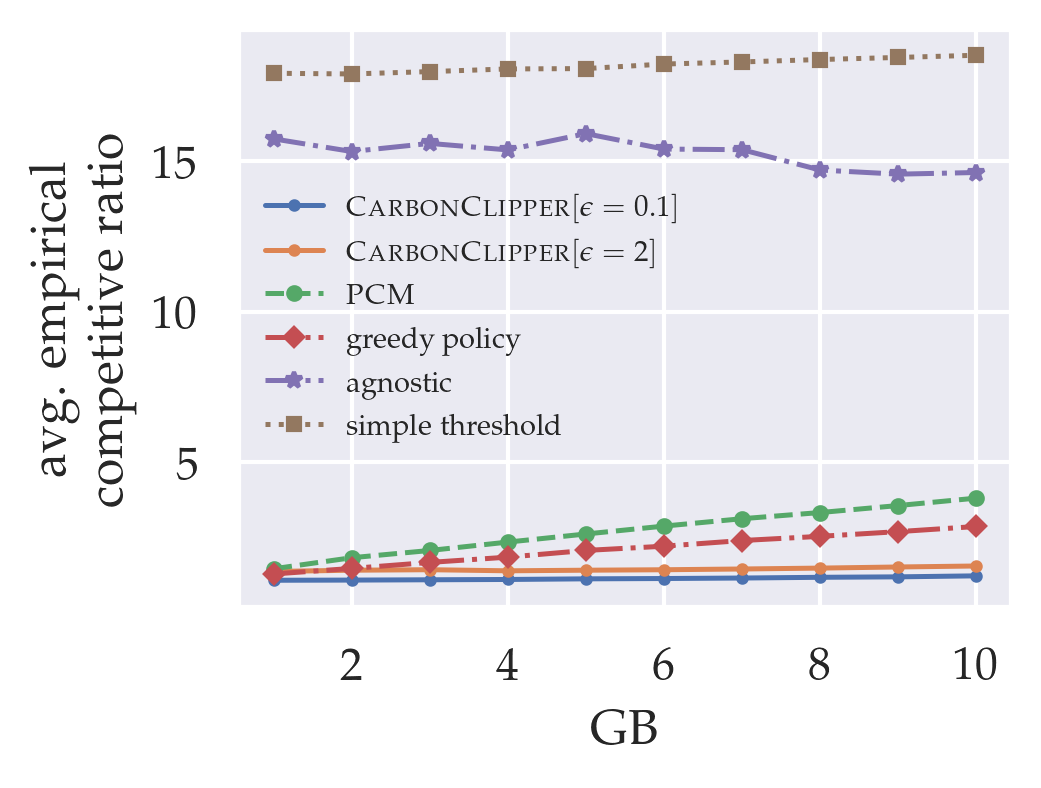

In [4]:
######################### plotting gb data

# compute average competitive ratio for each setting of UL
pcms = []
greedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for gb in gbs:
    cost_opts = results[("GB", gb)]["cost_opts"]
    cost_pcms = results[("GB", gb)]["cost_pcms"]
    cost_greedys = results[("GB", gb)]["cost_greedys"]
    cost_agnostics = results[("GB", gb)]["cost_agnostics"]
    cost_constThresholds = results[("GB", gb)]["cost_constThresholds"]
    cost_clip0s = results[("GB", gb)]["cost_clip0s"]
    cost_clip2s = results[("GB", gb)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if crClip2 < 1:
        crClip2 = 1

    pcms.append(crPCM)
    greedys.append(crGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(gbs, clip0s, label="$\\textsc{CarbonClipper}[\\epsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(gbs, clip2s, label="$\\textsc{CarbonClipper}[\\epsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(gbs, pcms, label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(gbs, greedys, label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(gbs, agnostics, label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(gbs, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# plt.xlim(50, 1150)
# plt.ylim(0, 20)
# plt.yticks([0, 5, 10, 15, 20])
# plt.xticks([50, 200, 400, 600, 800, 1000, 1150])
# plt.legend()
plt.xlabel("GB")
plt.ylabel("avg. empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/gb.pdf", bbox_inches='tight', pad_inches=0)
plt.legend(loc='center left', fontsize=7, frameon=False)


[10.92920425  7.77450264 15.02803666 ... 11.95777409 10.43529497
 12.43863336]
[ 8.54759585  3.1158066  10.31555792 ...  8.20734661  7.06158385
  1.00801619]


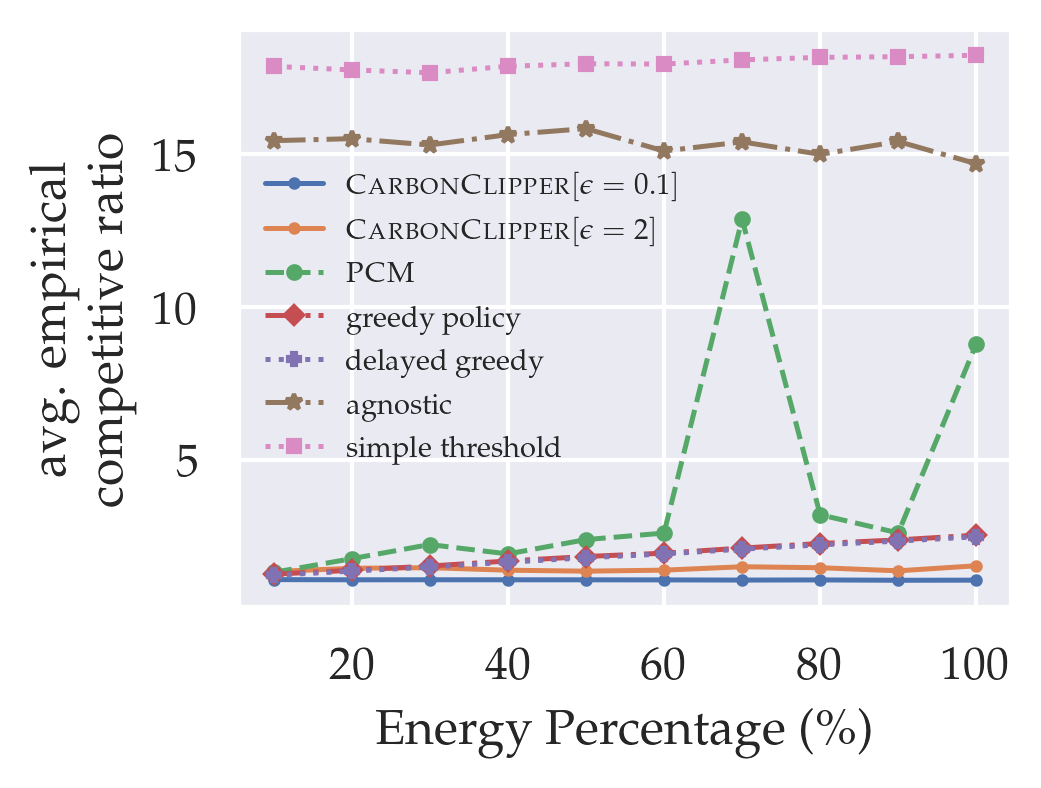

In [25]:
######################### plotting energy data

# compute average competitive ratio for each setting of energy
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for energy in energys:
    cost_opts = results[("energy", energy)]["cost_opts"]
    cost_pcms = results[("energy", energy)]["cost_pcms"]
    cost_greedys = results[("energy", energy)]["cost_greedys"]
    cost_delayGreedys = results[("energy", energy)]["cost_delayGreedys"]
    cost_agnostics = results[("energy", energy)]["cost_agnostics"]
    cost_constThresholds = results[("energy", energy)]["cost_constThresholds"]
    cost_clip0s = results[("energy", energy)]["cost_clip0s"]
    cost_clip2s = results[("energy", energy)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    # if crClip2 < 1:
    #     crClip2 = 1
    if energy in [70, 80, 100]:
        print(np.array(cost_pcms) / np.array(cost_opts))
    # print("PCM {}: ".format(energy), np.mean(np.array(cost_pcms) / np.array(cost_opts)), np.percentile(np.array(cost_pcms) / np.array(cost_opts), 95))

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(energys, clip0s, label="$\\textsc{CarbonClipper}[\\epsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(energys, clip2s, label="$\\textsc{CarbonClipper}[\\epsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(energys, pcms, label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(energys, greedys, label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(energys, delayGreedys, label="delayed greedy", marker='P', linestyle='dotted', markersize=3, linewidth=lw)
plt.plot(energys, agnostics, label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(energys, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# plt.xlim(50, 1150)
# plt.ylim(0, 5)
# plt.yticks([0, 5, 10, 15, 20])
# plt.xticks([50, 200, 400, 600, 800, 1000, 1150])
# plt.legend()
plt.xlabel("Energy Percentage (\%)")
plt.ylabel("avg. empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/energy.pdf", bbox_inches='tight', pad_inches=0)
plt.legend(loc='center left', fontsize=7, frameon=False)

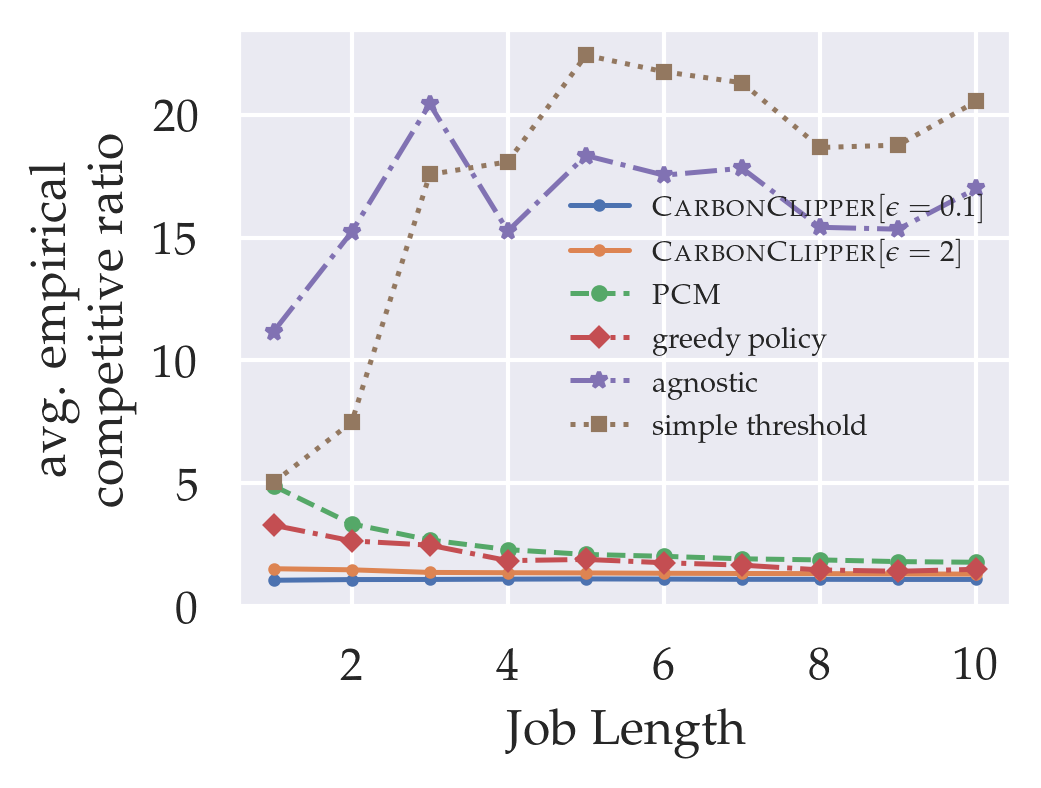

In [5]:
######################### plotting length data

# compute average competitive ratio for each setting of UL
pcms = []
greedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for length in lengths:
    cost_opts = results[("length", length)]["cost_opts"]
    cost_pcms = results[("length", length)]["cost_pcms"]
    cost_greedys = results[("length", length)]["cost_greedys"]
    cost_agnostics = results[("length", length)]["cost_agnostics"]
    cost_constThresholds = results[("length", length)]["cost_constThresholds"]
    cost_clip0s = results[("length", length)]["cost_clip0s"]
    cost_clip2s = results[("length", length)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if crClip2 < 1:
        crClip2 = 1

    pcms.append(crPCM)
    greedys.append(crGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(lengths, clip0s, label="$\\textsc{CarbonClipper}[\\epsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(lengths, clip2s, label="$\\textsc{CarbonClipper}[\\epsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(lengths, pcms, label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(lengths, greedys, label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(lengths, agnostics, label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(lengths, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# plt.xlim(50, 1150)
# plt.ylim(0, 20)
# plt.yticks([0, 5, 10, 15, 20])
# plt.xticks([50, 200, 400, 600, 800, 1000, 1150])
# plt.legend()
plt.xlabel("Job Length")
plt.ylabel("avg. empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/length.pdf", bbox_inches='tight', pad_inches=0)
plt.legend(loc='center right', fontsize=7, frameon=False)


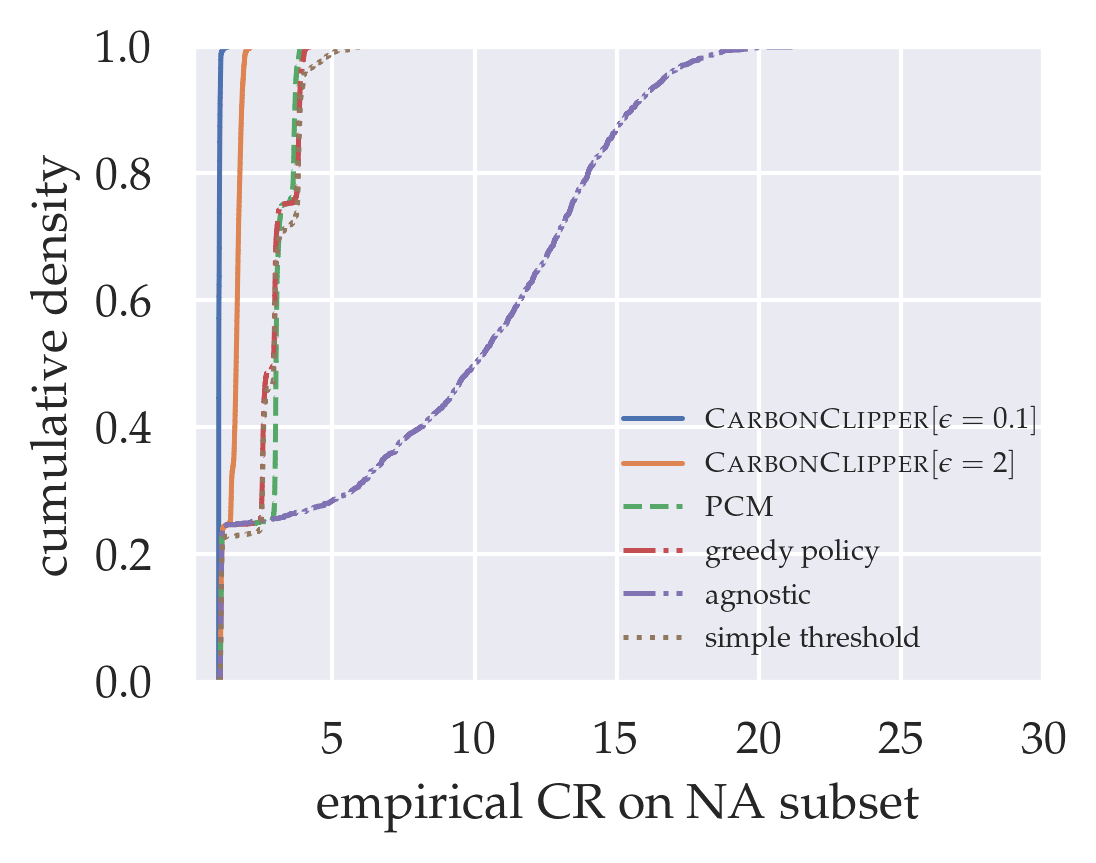

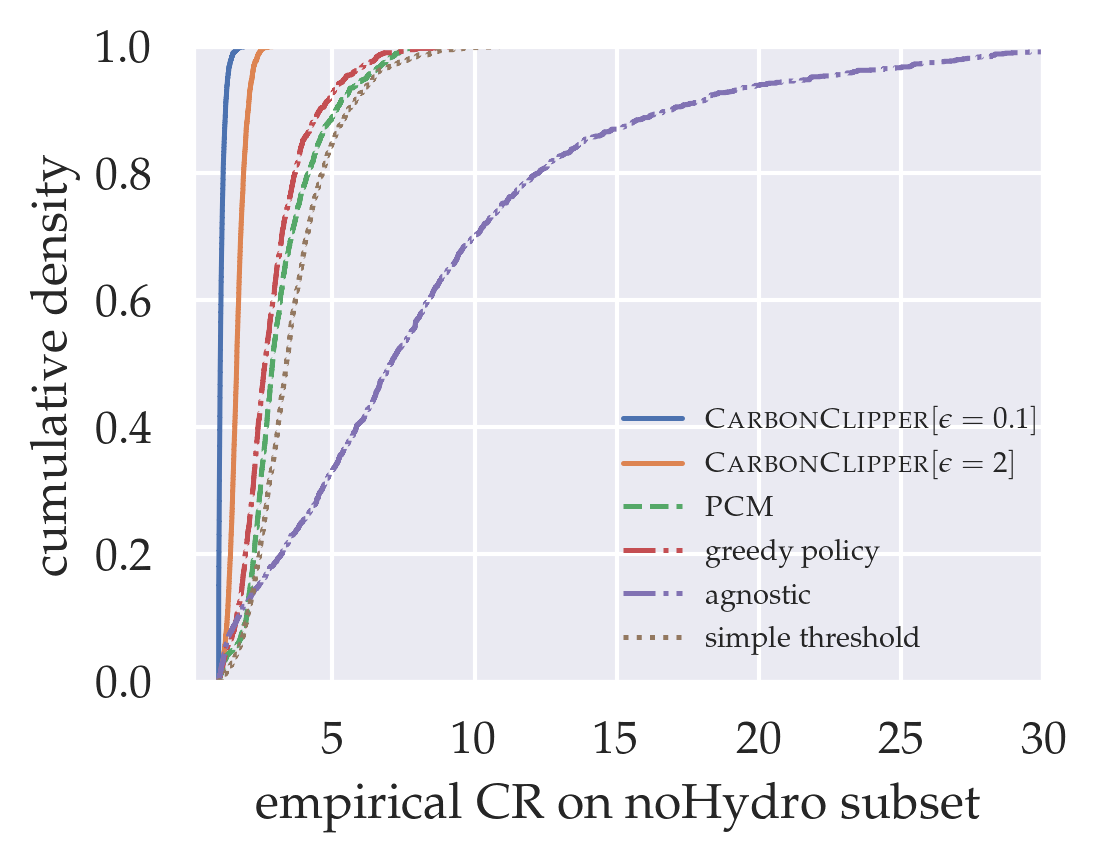

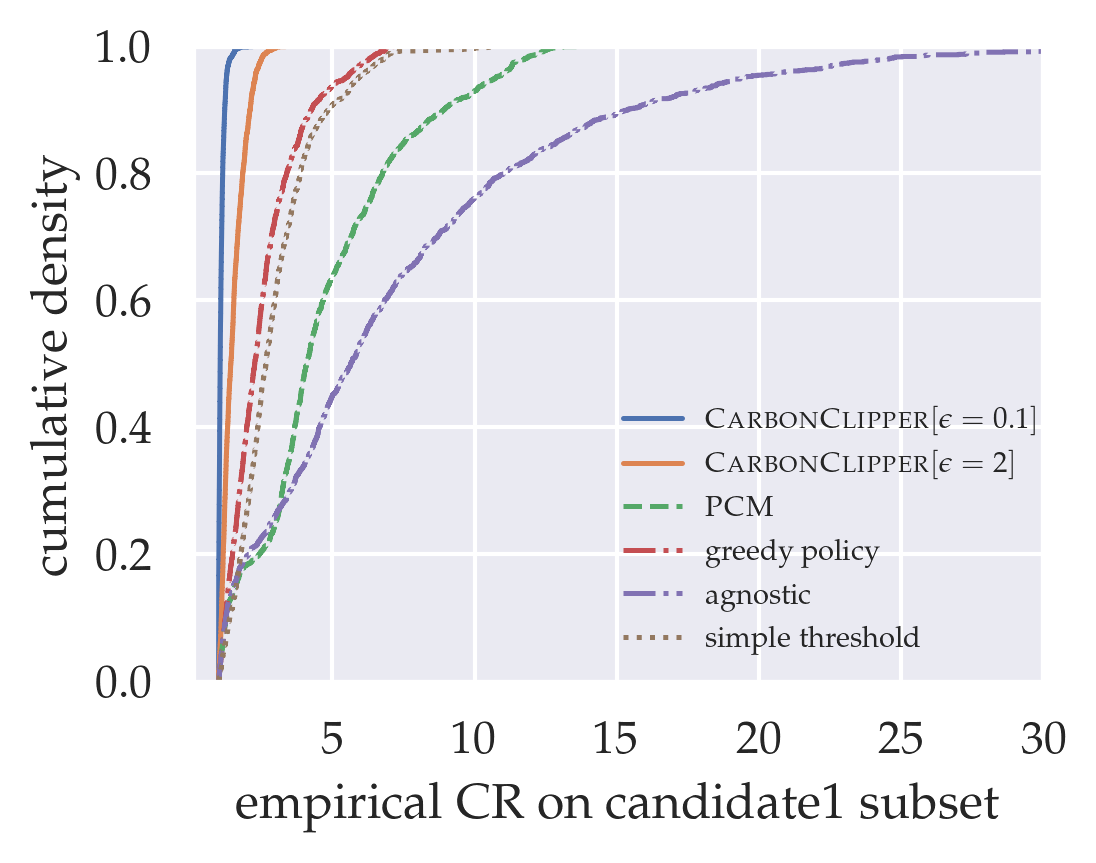

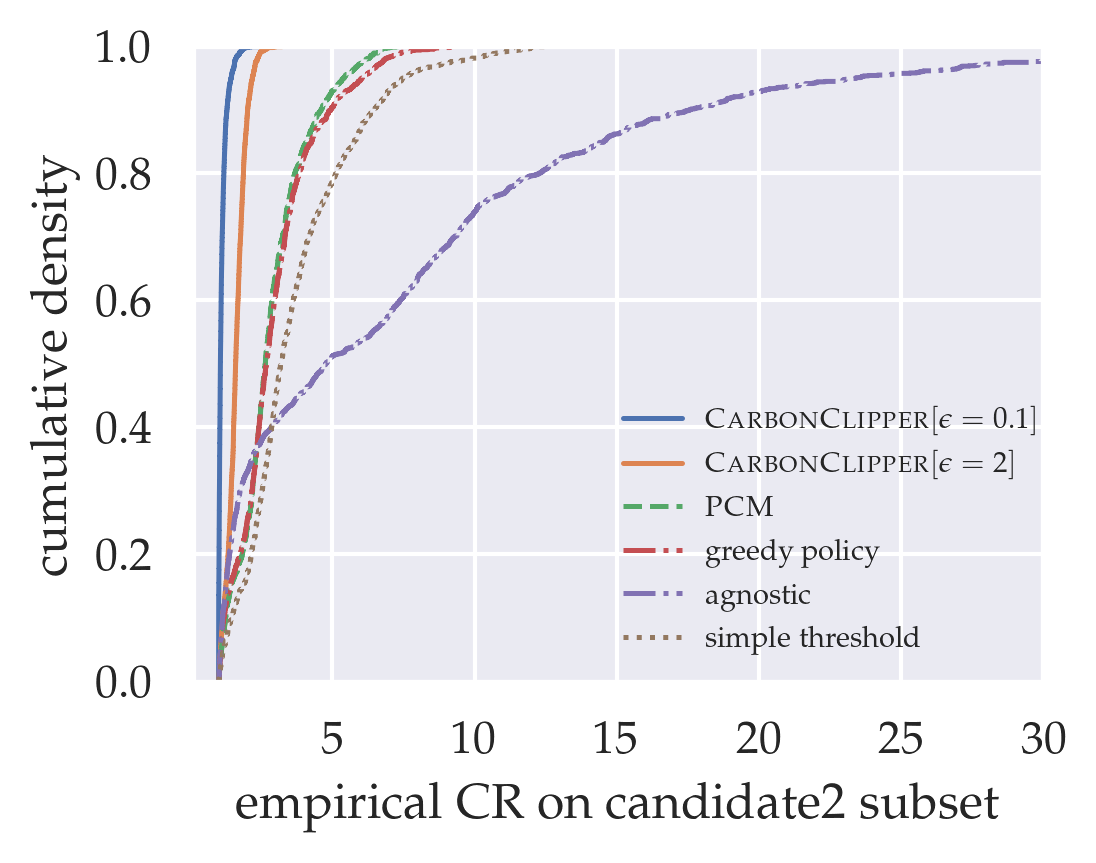

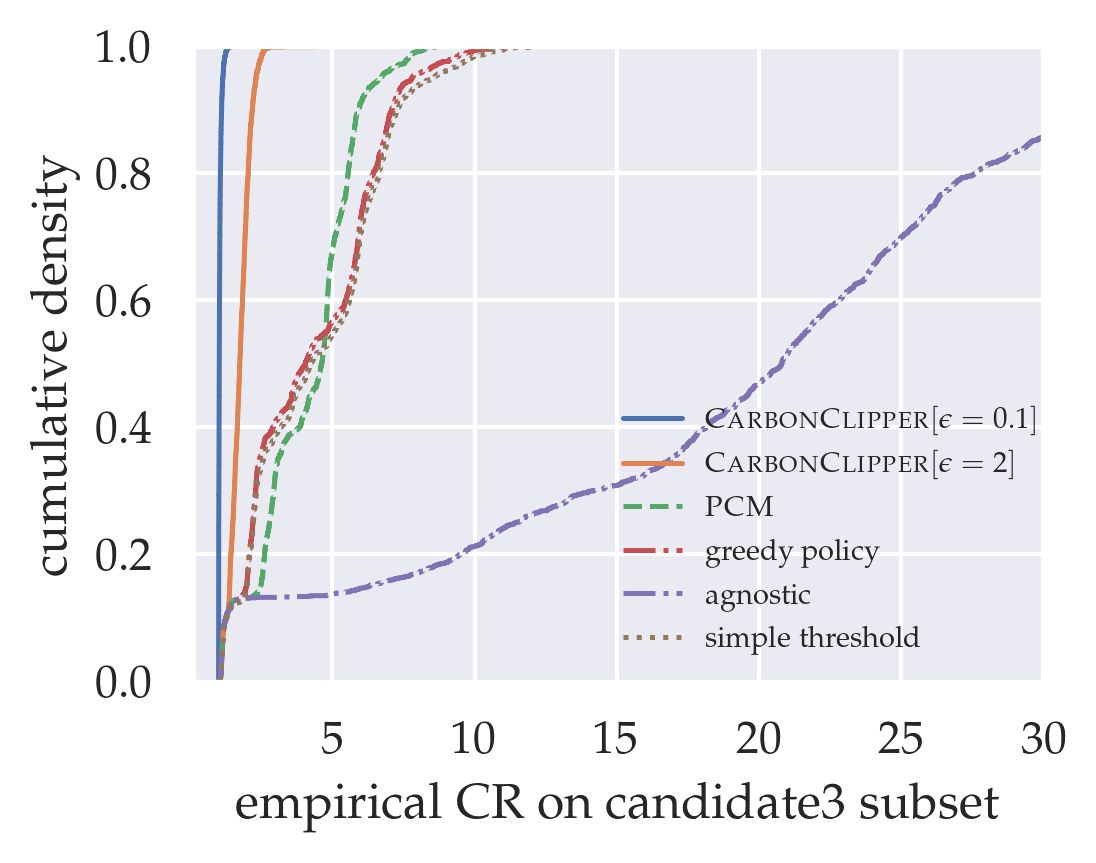

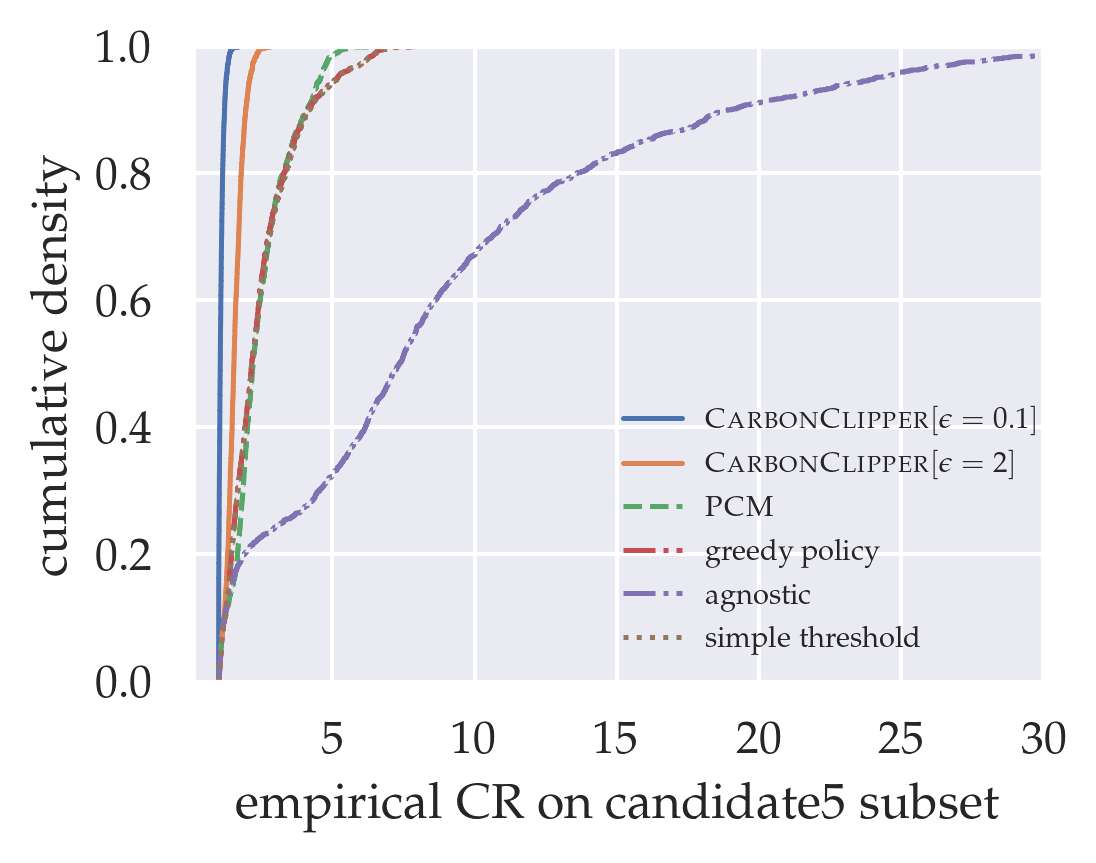

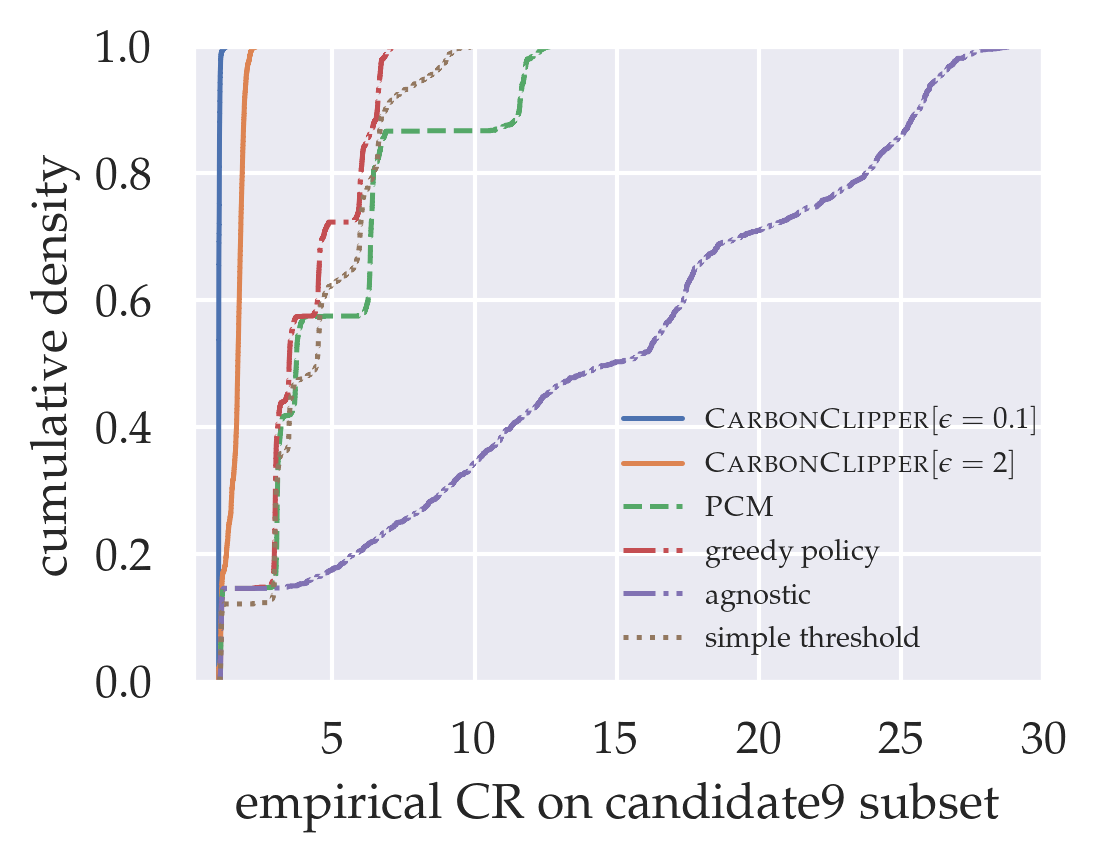

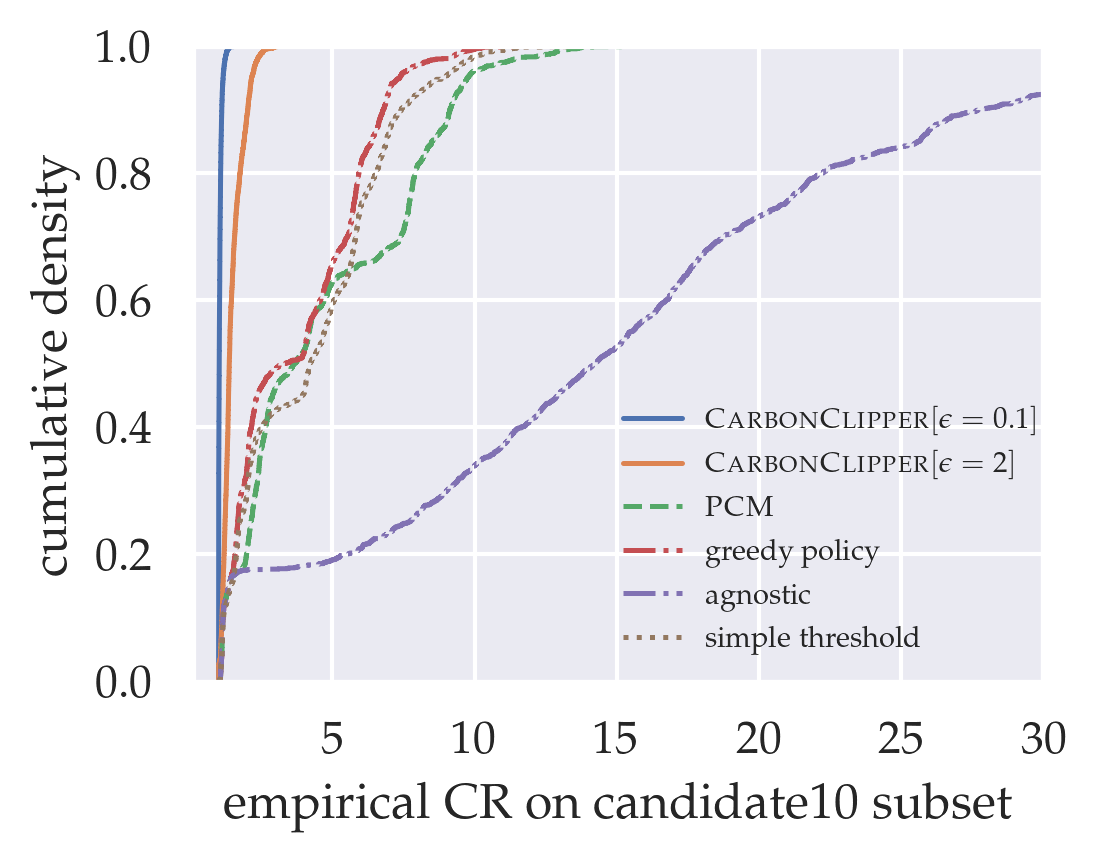

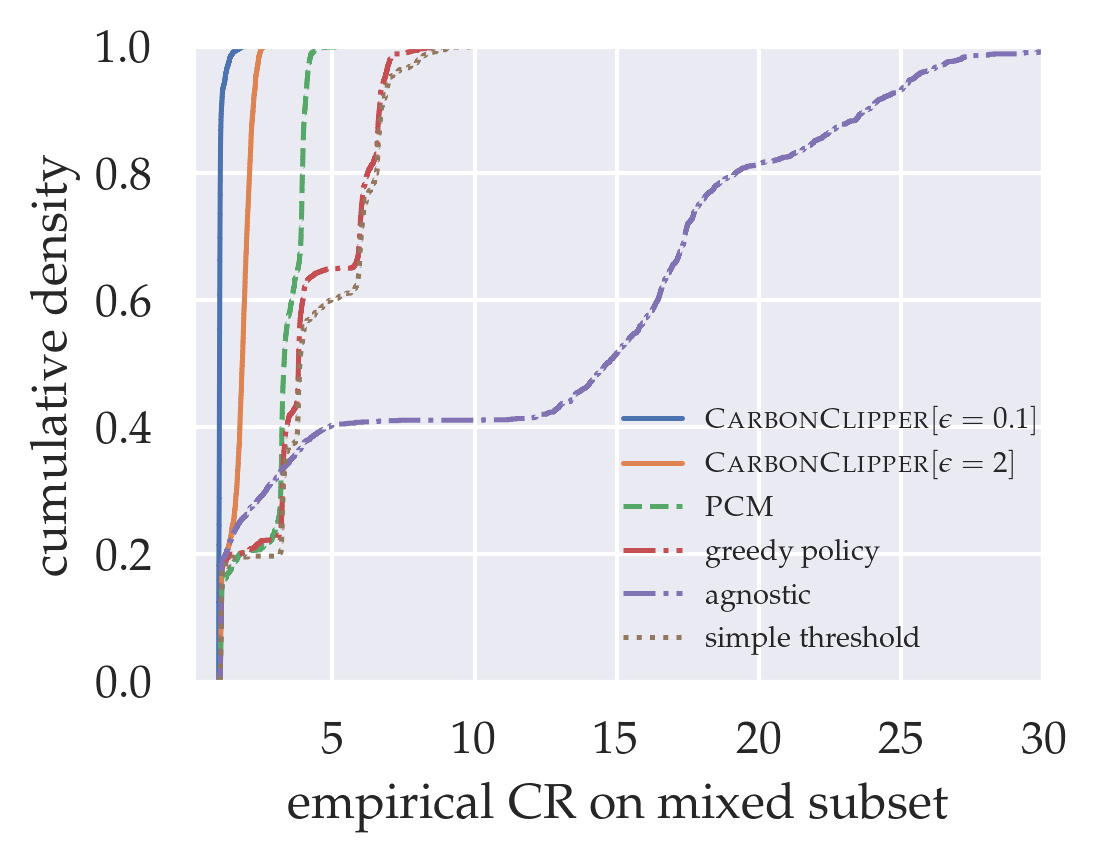

In [6]:
# for each subset, plot the CDF

for subset in subsets:
    if subset in ["candidate4", "candidate6", "candidate7", "candidate8", "candidate12", "candidate13", "candidate14"]:
        continue
    cost_opts = results[("subset", subset)]["cost_opts"]
    cost_pcms = results[("subset", subset)]["cost_pcms"]
    cost_greedys = results[("subset", subset)]["cost_greedys"]
    cost_agnostics = results[("subset", subset)]["cost_agnostics"]
    cost_constThresholds = results[("subset", subset)]["cost_constThresholds"]
    cost_clip0s = results[("subset", subset)]["cost_clip0s"]
    cost_clip2s = results[("subset", subset)]["cost_clip2s"]

    pcms = np.array(cost_pcms) / np.array(cost_opts)
    greedys = np.array(cost_greedys) / np.array(cost_opts)
    agnostics = np.array(cost_agnostics) / np.array(cost_opts)
    constThresholds = np.array(cost_constThresholds) / np.array(cost_opts)
    clip0s = np.array(cost_clip0s) / np.array(cost_opts)
    clip2s = np.array(cost_clip2s) / np.array(cost_opts)

    # if there are any competitive ratios < 1, then set them to 1
    pcms[pcms < 1] = 1
    greedys[greedys < 1] = 1
    agnostics[agnostics < 1] = 1
    constThresholds[constThresholds < 1] = 1
    clip0s[clip0s < 1] = 1
    clip2s[clip2s < 1] = 1

    # plot the cdf of the competitive ratio 
    plt.figure(figsize=(3.6575, 2.75), dpi=300)
    lw = 1.2
    sns.ecdfplot(data = clip0s, label="$\\textsc{CarbonClipper}[\\epsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
    sns.ecdfplot(data = clip2s, label="$\\textsc{CarbonClipper}[\\epsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
    sns.ecdfplot(data = pcms, label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
    sns.ecdfplot(data = greedys, label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
    sns.ecdfplot(data = agnostics, label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
    sns.ecdfplot(data = constThresholds, label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
    plt.ylabel("cumulative density", fontsize=12)
    # move legend to the right
    plt.legend(loc='lower right', bbox_to_anchor=(1.025, 0.0), fontsize=7, frameon=False)
    subsetname = subset
    if subset == "candidate11":
        subsetname = "mixed"
    plt.xlabel("empirical CR on {} subset".format(subsetname), fontsize=12)
    plt.xlim(0.1, 30)
    plt.savefig("plots/cdf_{}.pdf".format(subsetname), bbox_inches='tight', pad_inches=0)

In [7]:
# make a plot with a big legend 
plt.figure(figsize=(8, 3), dpi=400)
plt.plot(dims, pcms, label="ALG1", marker='.', linestyle='solid', markersize=6)
# plt.plot(dims, greedys, label="lazy agnostic", marker='D', linestyle='dashdot', markersize=4)
plt.plot(dims, agnostics, label="agnostic", marker='o', linestyle='dashdot', markersize=4)
plt.plot(dims, constThresholds, label="simple threshold", marker='s', linestyle='dotted', markersize=4)
plt.plot(dims, clip0s, label="move to minimizer", marker='*', linestyle='dashed', markersize=6)
plt.plot(dims, clip2s, label="CLIP[$\\epsilon = 2$]", marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), markersize=5)
plt.xlim(5, 20)
plt.xlabel("$d$")
plt.ylabel("avg. empirical competitive ratio")
# 6 column legend
plt.legend(ncol=6, bbox_to_anchor=(0.5, -0.35), loc='lower center')
plt.savefig("plots/legend.pdf", bbox_inches='tight')

NameError: name 'dims' is not defined

<Figure size 3200x1200 with 0 Axes>

[1.0, 2.3983967910606934, 3.796793582121387, 5.19519037318208, 6.593587164242774, 7.991983955303466, 9.39038074636416, 12.187174328485547, 14.983967910606932, 17.782006131780847]


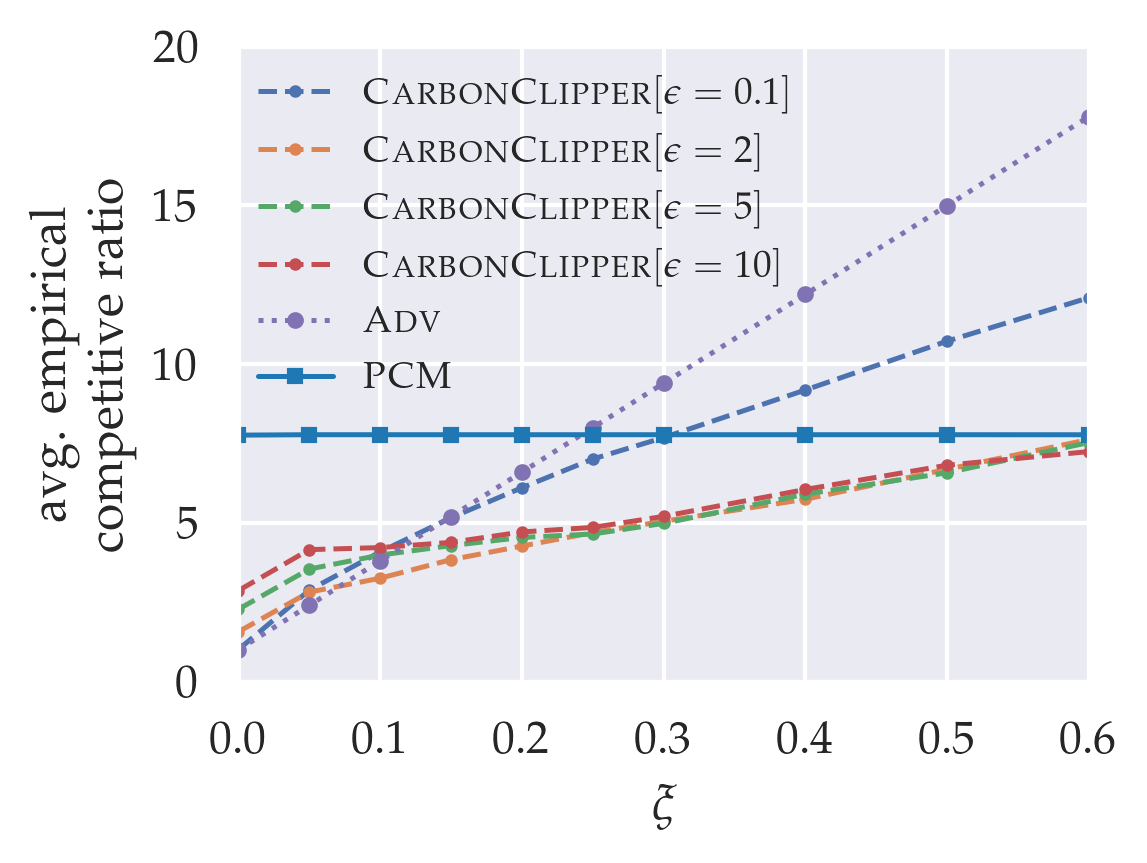

In [ ]:
######################### plotting xi data

# style.use('seaborn-v0_8-paper')

# # access colors from the style
# colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# style.use('tableau-colorblind10')

# compute average competitive ratio for each setting of UL
pcms = []
advs = []
greedys = []
clip0s = []
clip2s = []
clip5s = []
clip10s = []
for xi in xis:
    cost_opts = results["xi{}".format(xi*100)]["cost_opts"]
    bad_costs = results["xi{}".format(xi*100)]["cost_advs"]
    cost_pcms = results["xi{}".format(xi*100)]["cost_pcms"]
    cost_greedys = results["xi{}".format(xi*100)]["cost_greedys"]
    cost_clip0s = results["xi{}".format(xi*100)]["cost_clip0s"]
    cost_clip2s = results["xi{}".format(xi*100)]["cost_clip2s"]
    cost_clip5s = results["xi{}".format(xi*100)]["cost_clip5s"]
    cost_clip10s = results["xi{}".format(xi*100)]["cost_clip10s"]

    cost_advs = ((xi)*np.array(bad_costs)) + (1-xi)*np.array(cost_opts)

    # if U == 550:
    #     cost_opts = results[("GB", gb)]["cost_opts"] / 2 + 1
    #     cost_pcms = results[("GB", gb)]["cost_pcms"] / 2 + 1
    #     cost_greedys = results[("GB", gb)]["cost_greedys"] / 2 + 1
    #     cost_agnostics = results[("GB", gb)]["cost_agnostics"] / 2 + 1
    #     cost_constThresholds = results[("GB", gb)]["cost_constThresholds"] / 2 + 1
    #     cost_clip0s = results[("GB", gb)]["cost_clip0s"] / 2 + 1
    #     cost_clip2s = results[("GB", gb)]["cost_clip2s"] / 2 + 1
    #     cost_baseline2s = results[("GB", gb)]["cost_baseline2s"] / 2 + 1


    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crAdv = (np.array(cost_advs) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()
    crClip5 = (np.array(cost_clip5s) / np.array(cost_opts)).mean()
    crClip10 = (np.array(cost_clip10s) / np.array(cost_opts)).mean()

    pcms.append(crPCM)
    advs.append(crAdv)
    greedys.append(crGreedy)
    clip0s.append(crClip0)
    clip2s.append(crClip2)
    clip5s.append(crClip5)
    clip10s.append(crClip10)

print(advs)

# plot the average competitive ratio 
plt.figure(figsize=(3.6575, 2.75), dpi=300)
lw = 1.2
plt.plot(xis, clip0s, label="$\\textsc{CarbonClipper}[\\epsilon = 0.1]$", marker='.', linestyle='dashed', markersize=4, linewidth=lw)
plt.plot(xis, clip2s, label="$\\textsc{CarbonClipper}[\\epsilon = 2]$", marker='.', linestyle='dashed', markersize=4, linewidth=lw)
plt.plot(xis, clip5s, label="$\\textsc{CarbonClipper}[\\epsilon = 5]$", marker='.', linestyle='dashed', markersize=4, linewidth=lw)
plt.plot(xis, clip10s, label="$\\textsc{CarbonClipper}[\\epsilon = 10]$", marker='.', linestyle='dashed', markersize=4, linewidth=lw)
plt.plot(xis, advs, label="$\\textsc{Adv}$", marker='.', linestyle='dotted', markersize=6, linewidth=lw)
plt.plot(xis, pcms, label='$\\textsc{PCM}$', marker='s', color='#1f77b4', linestyle='solid', markersize=3, linewidth=lw)
# plt.plot(xis, greedys, label='greedy policy', marker='o', linestyle='dashdot', markersize=3, linewidth=lw)
plt.xlim(0, 0.6)

plt.ylim(0, 20)
plt.yticks([0, 5, 10, 15, 20])

# legend in three columns at the top
plt.legend(ncol=1, loc=(0.005,0.42), fontsize=9, frameon=False)
plt.xlabel("$\\xi$", fontsize=12)
plt.ylabel("avg. empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/xi.pdf", bbox_inches='tight', pad_inches=0)